# Problem Statement and Description

Diabetes is a disease without a cure and can be detrimental to health without management. The goal of this project is to accurately predict if a patient has diabetes or not by analyzing a handful of different variables


# Dataset Description

Data contains predictor variables for diabetes including pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, age.

In [1]:
#import libraries
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from file
data = pd.read_csv("input/diabetes.csv")
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
626,0,125,68,0,0,24.7,0.206,21,0
133,8,84,74,31,0,38.3,0.457,39,0
533,6,91,0,0,0,29.8,0.501,31,0
414,0,138,60,35,167,34.6,0.534,21,1
243,6,119,50,22,176,27.1,1.318,33,1


In [3]:
x = data.drop(["Outcome"], axis = 1)
y = data.Outcome.values.reshape(-1, 1)

In [4]:
#train off the data
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_prediction = lr.predict(x_test)

lr_cm = confusion_matrix(y_test,lr_prediction)
print("Logistic Regression Accuracy :",lr.score(x_test, y_test))
print("Logistic Regression Validity: ", lr.score(x_val, y_val))

Logistic Regression Accuracy : 0.7792207792207793
Logistic Regression Validity:  0.7560975609756098


/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)

knn_cm = confusion_matrix(y_test, knn_prediction)
print("KNN Classification Accuracy: ", knn.score(x_test, y_test))
print("KNN Classification Accuracy: ", knn.score(x_val, y_val))

KNN Classification Accuracy:  0.8181818181818182
KNN Classification Accuracy:  0.7398373983739838


/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

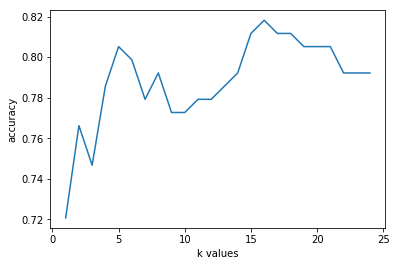

Best accuracy is 0.8181818181818182 with k = 16


In [23]:
score_list = []
for each in range(1, 25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
 
    
plt.plot(range(1, 25), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

print("Best accuracy is {} with k = {}".format(np.max(score_list), 1 + score_list.index(np.max(score_list))))


In [24]:
#SVM Classification
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
svm_prediction = svm.predict(x_test)

svm_cm = confusion_matrix(y_test, svm_prediction)
print("Support Vector Classification Accuracy: ", svm.score(x_test, y_test))
print("SVM Validity: ", svm.score(x_val, y_val))

Support Vector Classification Accuracy:  0.7922077922077922
SVM Validity:  0.7886178861788617


/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_prediction = nb.predict(x_test)

nb_cm = confusion_matrix(y_test, nb_prediction)
print("Naive Bayes Classification Accuracy:", nb.score(x_test, y_test))
print("Naive Bayes Classification Validity:", nb.score(x_val, y_val))

Naive Bayes Classification Accuracy: 0.7792207792207793
Naive Bayes Classification Validity: 0.7154471544715447


/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#Decision Tree - 76.623% Accuracy
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_prediction= dt.predict(x_test)

dt_cm = confusion_matrix(y_test,dt_prediction)
print("Decision Tree Classification Accuracy:",dt.score(x_test,y_test))
print("Decision Tree Classification Validity:",dt.score(x_val,y_val))

Decision Tree Classification Accuracy: 0.6753246753246753
Decision Tree Classification Validity: 0.6666666666666666


In [18]:
#Random Forest - 80.519% Accuracy
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_prediction= rf.predict(x_test)

rf_cm = confusion_matrix(y_test,rf_prediction)
print("Random Forest Classification Accuracy:",rf.score(x_test,y_test))
print("Random Forest Classification Validity:",rf.score(x_val,y_val))

Random Forest Classification Accuracy: 0.7922077922077922
Random Forest Classification Validity: 0.7398373983739838


/home/cs52701/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


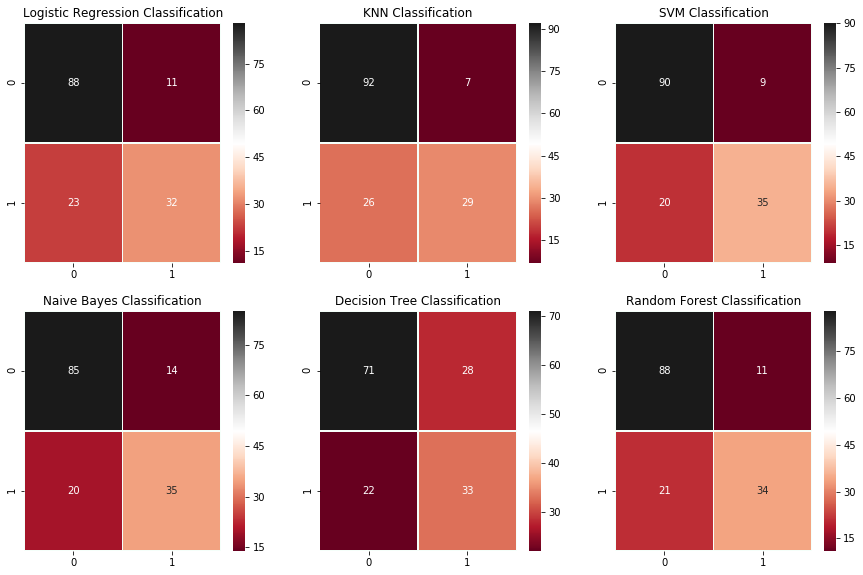

In [19]:
#Confusion Matrix
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')


sns.heatmap(data=lr_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax1, cmap='RdGy')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax2, cmap='RdGy')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax3, cmap='RdGy')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax4, cmap='RdGy')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax5, cmap='RdGy')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.5, linecolor='mintcream', fmt='.0f', ax=ax6, cmap='RdGy')
plt.show()

Text(0.5, 1.0, 'Visuals for Training Dataset')

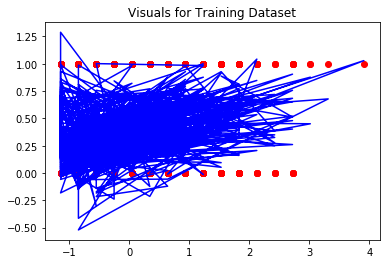

In [20]:
#Simple Linear Regression on training data
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)
reg = LinearRegression()
reg.fit(x_train, y_train)

pred = reg.predict(x_test)
plt.scatter(x_train[:,0], y_train, color = 'red')
plt.plot(x_train[:,0], reg.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")

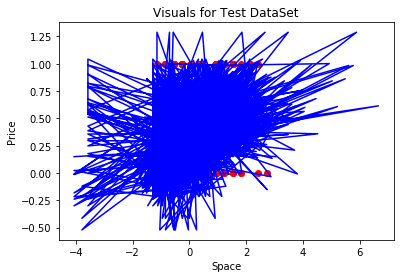

In [21]:
#Simple Linear Regression on test data
plt.scatter(x_test[:,0], y_test, color= 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

# Results and Conclusions

 - KNN had the best accuracy<br>
 - All methods had fairly consistent validity and accuracy<br>
 - Simple linear regression did not work for my dataset, outcome is binary<br>
 - Learning how to use the algorithms and selecting a proper dataset <br>
 - Larger data set would improve accuracy<br>
